## Otros graficos y Storytelling
<div style="text-align: right">
Victor Miguel Garcia Sanchez
</div>

---
Carga de librerias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from bokeh.plotting import figure, output_file, show
from bokeh.layouts import gridplot
from bokeh.models import ColumnDataSource
from bokeh.io import output_notebook
from mpl_toolkits.mplot3d import Axes3D
from wordcloud import WordCloud

Lectura de datos

In [ ]:
# Cargar los datasets
athlete_data = pd.read_csv('sample_data/athlete_events.csv', skiprows=[13818, 27523, 41228, 48063, 68451, 95838, 102626])

region_data = pd.read_csv('sample_data/noc_regions.csv')

Combinar los datasets para tener la información de regiones en el dataset de eventos de atletas

In [ ]:
athlete_data = pd.merge(athlete_data, region_data[['NOC', 'region']], how='left', on='NOC')

Mostrar las columnas disponibles en el dataset de eventos de atletas

In [ ]:
print("\nColumnas del dataset de eventos de atletas:")
athlete_data.head()


Columnas del dataset de eventos de atletas:


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands


### Gráficos de dispersión - Correlación
Gráfico de dispersión entre Edad y Altura

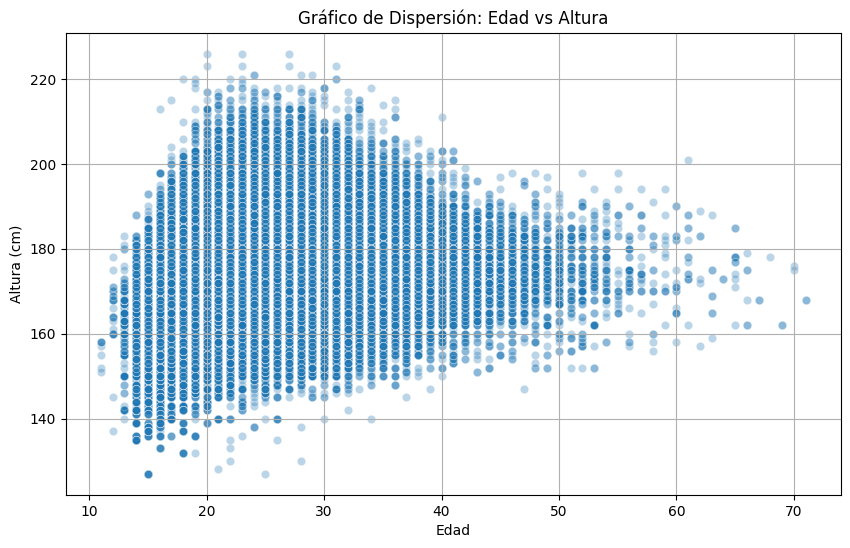

In [ ]:
# Convertir las columnas 'Age' y 'Height' a numéricas, y manejar valores no válidos
athlete_data['Age'] = pd.to_numeric(athlete_data['Age'], errors='coerce')
athlete_data['Height'] = pd.to_numeric(athlete_data['Height'], errors='coerce')

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Height', data=athlete_data, alpha=0.3)
plt.title('Gráfico de Dispersión: Edad vs Altura')
plt.xlabel('Edad')
plt.ylabel('Altura (cm)')
plt.grid(True)
plt.show()

Gráfico de dispersión entre Peso y Altura con codificación por Sexo

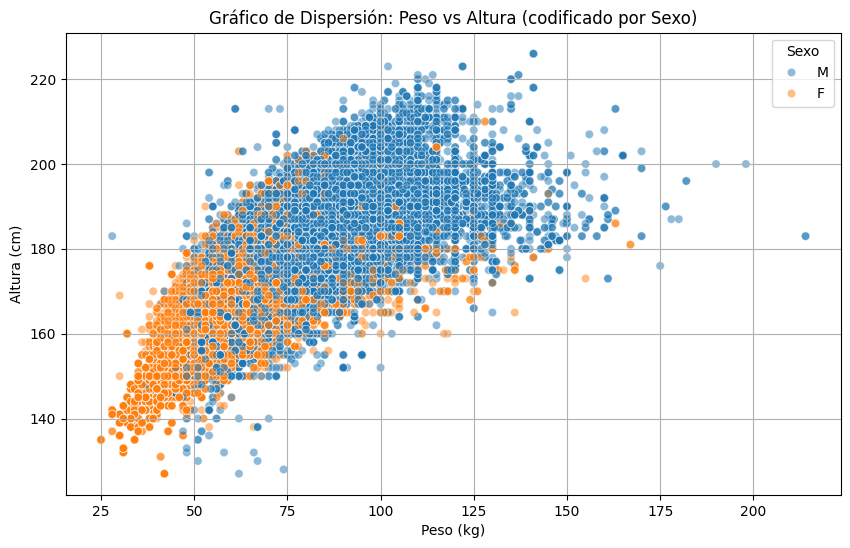

In [ ]:
# Convertir las columnas 'Age' y 'Height' a numéricas, y manejar valores no válidos
athlete_data['Weight'] = pd.to_numeric(athlete_data['Weight'], errors='coerce')

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Weight', y='Height', hue='Sex', data=athlete_data, alpha=0.5)
plt.title('Gráfico de Dispersión: Peso vs Altura (codificado por Sexo)')
plt.xlabel('Peso (kg)')
plt.ylabel('Altura (cm)')
plt.grid(True)
plt.legend(title='Sexo')
plt.show()

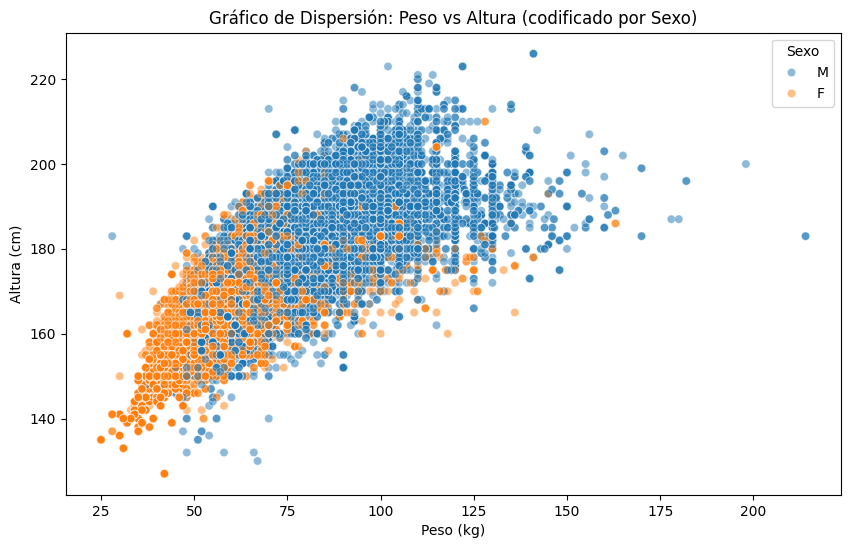

In [ ]:
# Filtrar por 'Sex' igual a 'M' o 'F'
athlete_data = athlete_data.loc[athlete_data['Sex'].isin(['M', 'F'])]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Weight', y='Height', hue='Sex', data=athlete_data, alpha=0.5)
plt.title('Gráfico de Dispersión: Peso vs Altura (codificado por Sexo)')
plt.xlabel('Peso (kg)')
plt.ylabel('Altura (cm)')
plt.grid(False)
plt.legend(title='Sexo')
plt.show()

Matriz de correlación

In [ ]:
correlation_matrix = athlete_data[['Age', 'Height', 'Weight']].corr()
correlation_matrix

,Age,Height,Weight
Age,1.000000,0.138268,0.212083
Height,0.138268,1.000000,0.796209
Weight,0.212083,0.796209,1.000000


Visualización de la matriz de correlación con mapa de calor

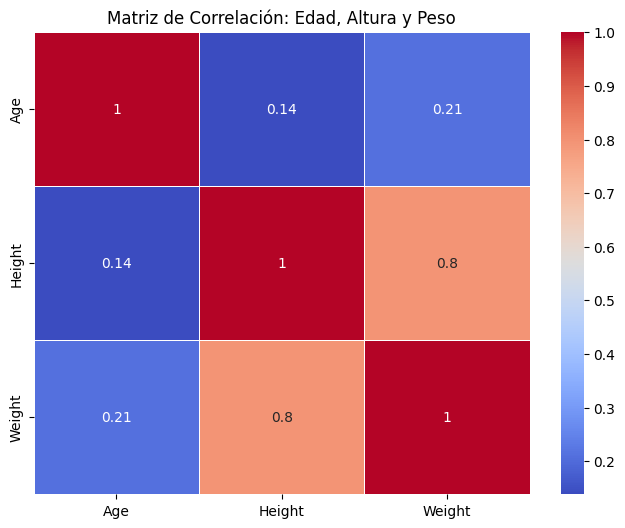

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación: Edad, Altura y Peso')
plt.show()

### Pairplots
Seleccionar un subconjunto de datos para evitar tiempos de espera largos

In [ ]:
sample_data = athlete_data.sample(n=1000, random_state=40)

Crear pairplot

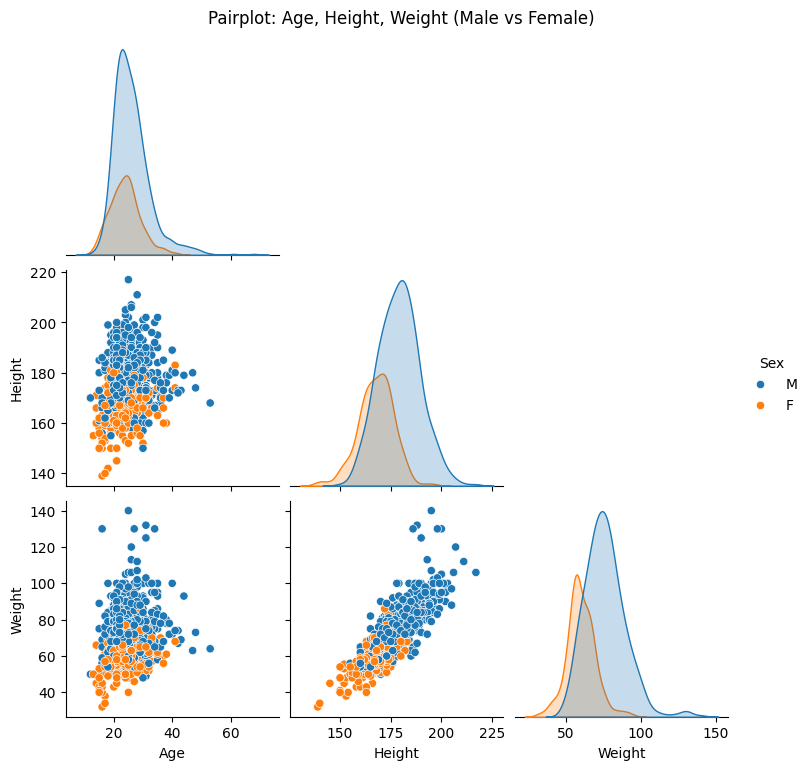

In [ ]:
sns.pairplot(sample_data, vars=['Age', 'Height', 'Weight'], hue='Sex', diag_kind='kde', corner=True)
plt.suptitle('Pairplot: Age, Height, Weight (Male vs Female)', y=1.02)
plt.show()

Crear pairplot con Plotly

In [ ]:
fig = px.scatter_matrix(sample_data, dimensions=['Age', 'Height', 'Weight'], color='Sex')
fig.update_layout(title='Pairplot: Age, Height, Weight (Male vs Female)')
fig.show()

Usando la libreria Bokeh

In [ ]:
# Asignar colores a cada categoría de sexo
colors = {'M': 'blue', 'F': 'orange'}
sample_data['color'] = sample_data['Sex'].map(colors)

# Crear una fuente de datos ColumnDataSource
source = ColumnDataSource(sample_data)

# Crear las figuras
p1 = figure(title='Age vs Height', x_axis_label='Age', y_axis_label='Height')
p1.circle('Age', 'Height', source=source, color='color', alpha=0.6)

p2 = figure(title='Age vs Weight', x_axis_label='Age', y_axis_label='Weight')
p2.circle('Age', 'Weight', source=source, color='color', alpha=0.6)

p3 = figure(title='Height vs Weight', x_axis_label='Height', y_axis_label='Weight')
p3.circle('Height', 'Weight', source=source, color='color', alpha=0.6)

# Crear un gridplot
grid = gridplot([[p1, p2], [None, p3]])

# Mostrar el gridplot
output_notebook()
show(grid)

### Gráficas de funciones (en una y varias dimensiones)
Función para graficar una función en una dimensión

In [ ]:
def plot_function_1d(x_values, y_values, title, xlabel, ylabel):
    plt.figure(figsize=(8, 6))
    plt.plot(x_values, y_values)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()

Función para graficar una función en dos dimensiones

In [ ]:
def plot_function_2d(x_values, y_values, z_values, title, xlabel, ylabel, zlabel):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x_values, y_values, z_values, c=z_values, cmap='viridis', edgecolor='none')
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_zlabel(zlabel)
    plt.show()

Graficar una función en una dimensión (Edad vs Altura)

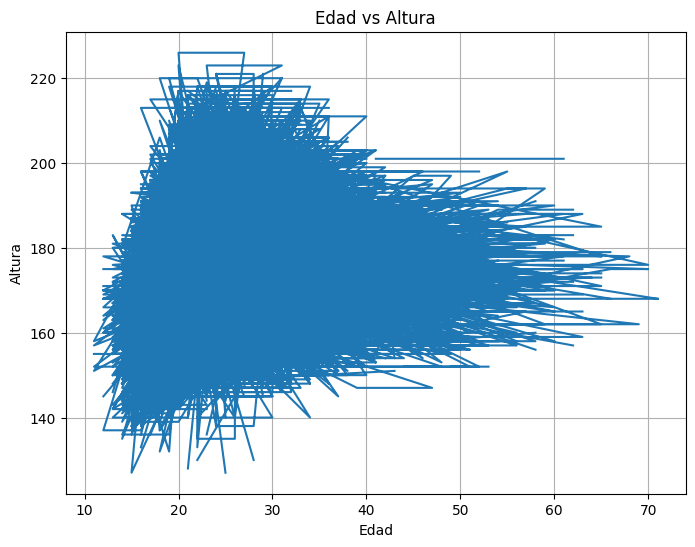

In [ ]:
plot_function_1d(athlete_data['Age'], athlete_data['Height'], 'Edad vs Altura', 'Edad', 'Altura')

Graficar una función en dos dimensiones (Edad vs Altura vs Peso)

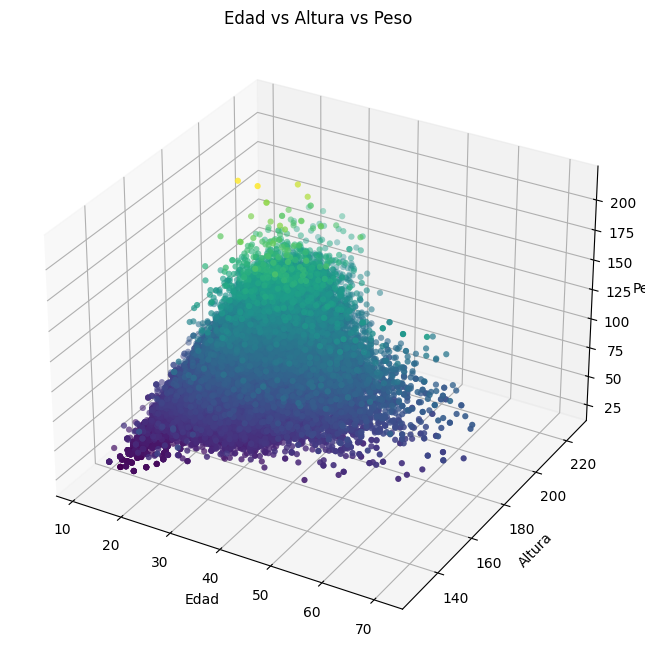

In [ ]:
plot_function_2d(athlete_data['Age'], athlete_data['Height'], athlete_data['Weight'],
                 'Edad vs Altura vs Peso', 'Edad', 'Altura', 'Peso')

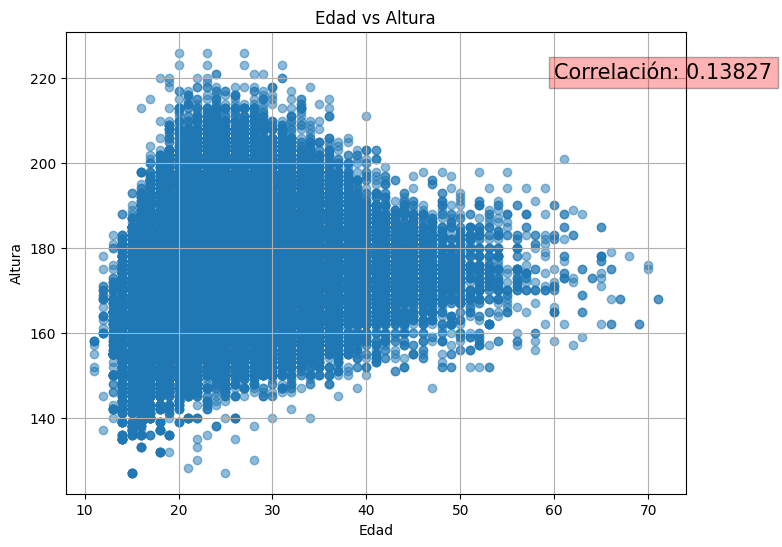

In [ ]:
# Calcular la correlación entre la edad y la altura
correlation = athlete_data['Age'].corr(athlete_data['Height'])

# Graficar la relación entre la edad y la altura
plt.figure(figsize=(8, 6))
plt.scatter(athlete_data['Age'], athlete_data['Height'], alpha=0.5)
plt.title('Edad vs Altura')
plt.xlabel('Edad')
plt.ylabel('Altura')
plt.text(60, 220, f'Correlación: {correlation:.5f}', fontsize=15, bbox=dict(facecolor='red', alpha=0.3))
plt.grid(True)
plt.show()

Histograma de la distribución de la edad

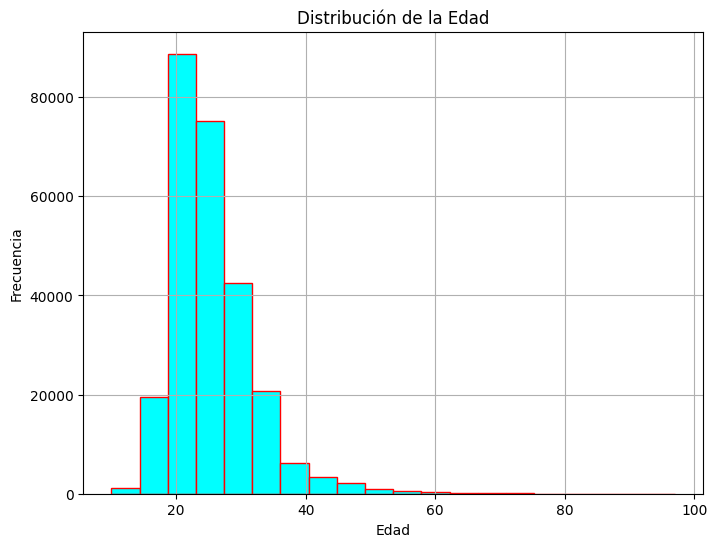

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(athlete_data['Age'], bins=20, color='cyan', edgecolor='red')
plt.title('Distribución de la Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

Gráfico de dispersión de la altura vs peso

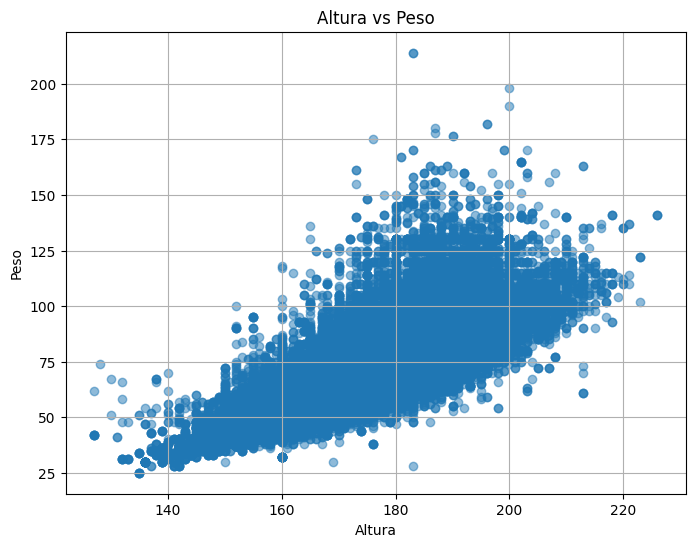

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(athlete_data['Height'], athlete_data['Weight'], alpha=0.5)
plt.title('Altura vs Peso')
plt.xlabel('Altura')
plt.ylabel('Peso')
plt.grid(True)
plt.show()

### Diagrama de caja-bigote y violín
Graficar diagrama de caja y bigote para la edad por sexo

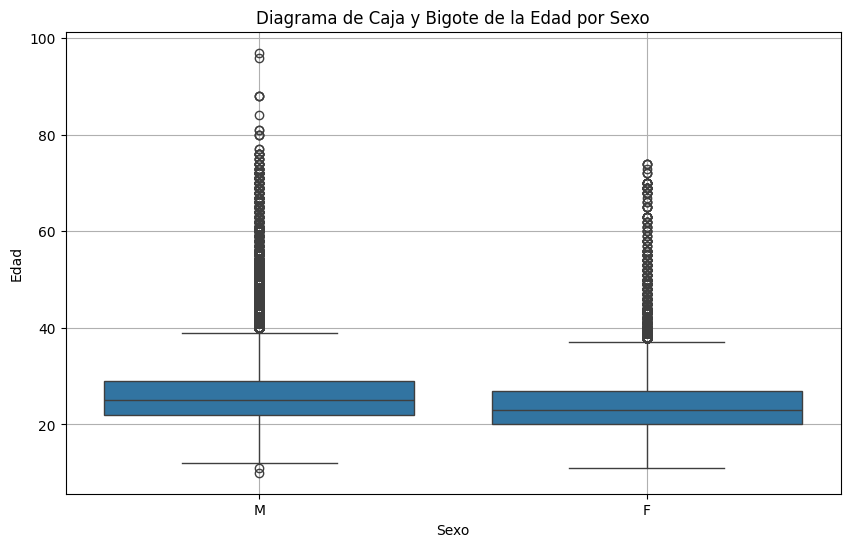

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sex', y='Age', data=athlete_data)
plt.title('Diagrama de Caja y Bigote de la Edad por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Edad')
plt.grid(True)
plt.show()

Graficar diagrama de violín para la altura por sexo

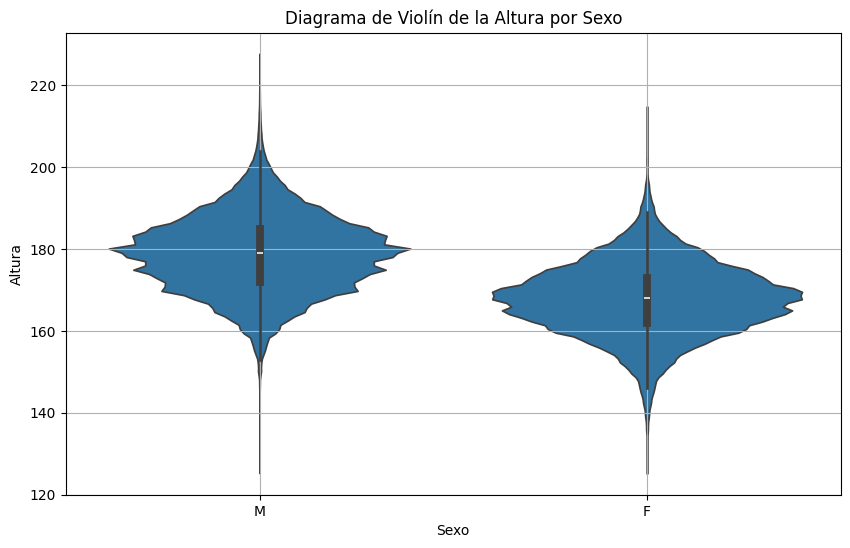

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Sex', y='Height', data=athlete_data)
plt.title('Diagrama de Violín de la Altura por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Altura')
plt.grid(True)
plt.show()

Comparación de la altura y el peso utilizando diagramas de caja y violín

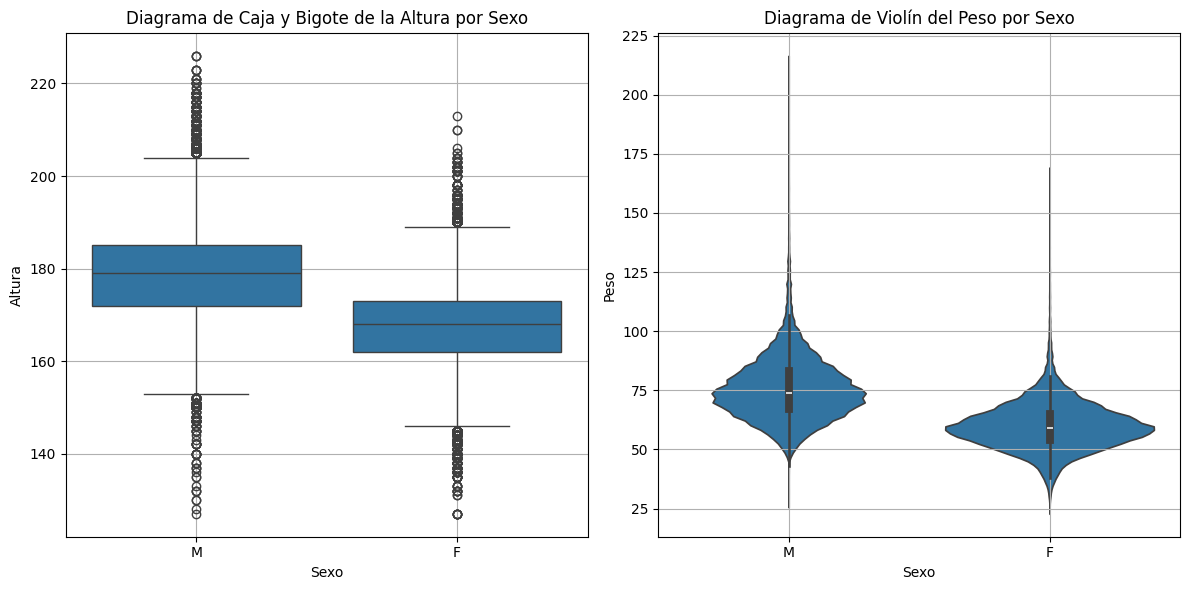

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='Sex', y='Height', data=athlete_data)
plt.title('Diagrama de Caja y Bigote de la Altura por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Altura')
plt.grid(True)

plt.subplot(1, 2, 2)
sns.violinplot(x='Sex', y='Weight', data=athlete_data)
plt.title('Diagrama de Violín del Peso por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Peso')
plt.grid(True)

plt.tight_layout()
plt.show()

Visualizar diagramas de caja y violín agrupados por el año de los Juegos

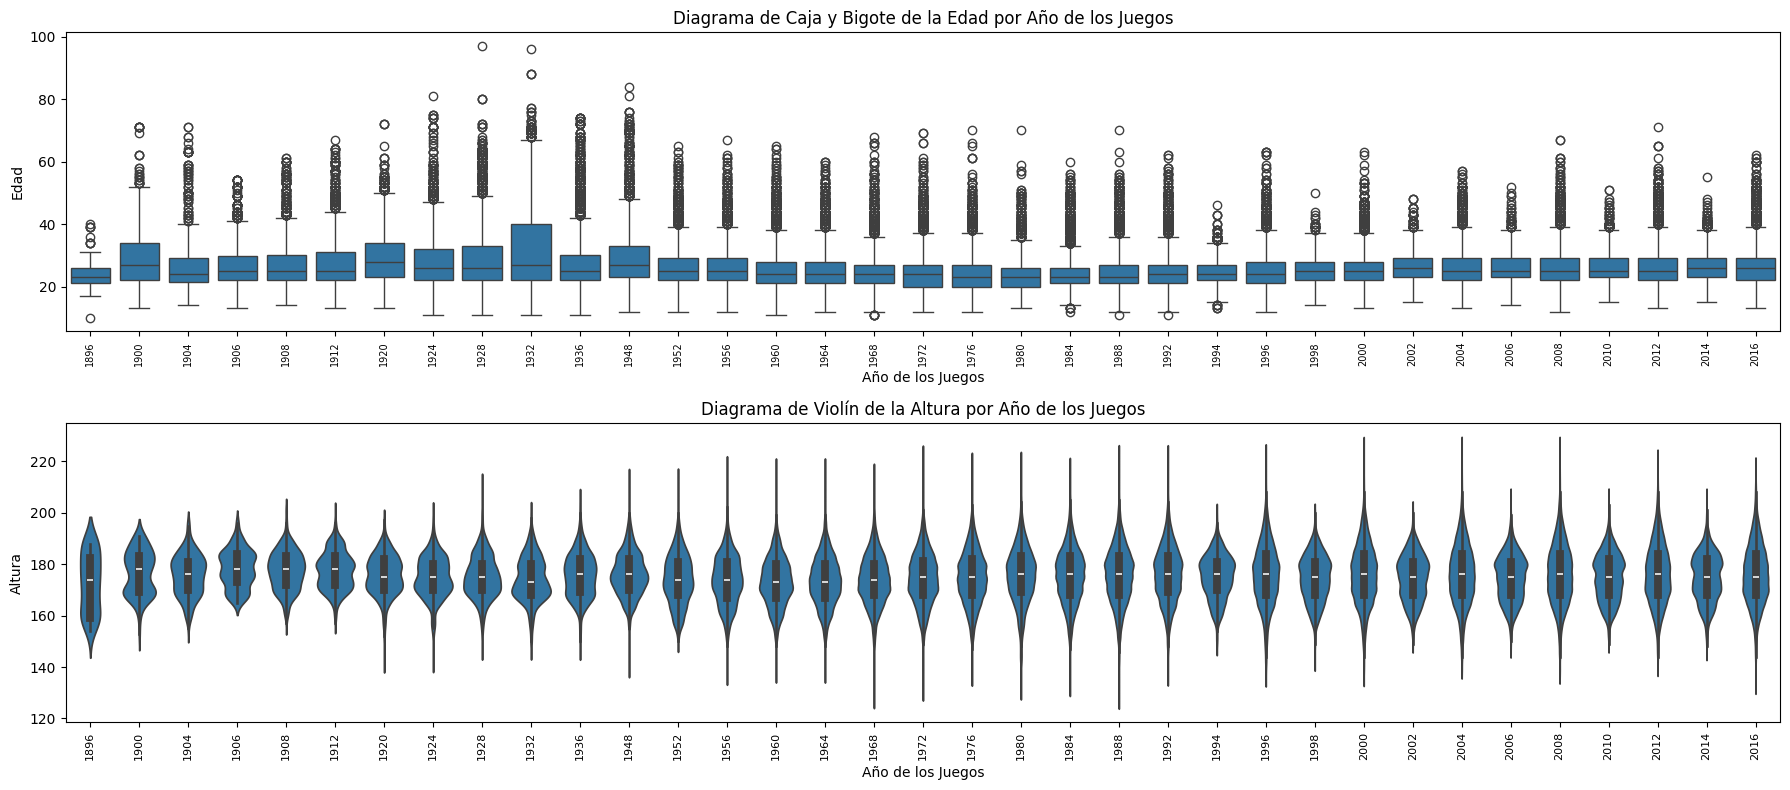

In [ ]:
# Filtrar por 'Year'
athlete_data = athlete_data.loc[athlete_data['Year']!='Tokyo']
athlete_data['Year'] = pd.to_numeric(athlete_data['Year'], errors='coerce').astype('Int64')

plt.figure(figsize=(18, 8))
plt.subplot(2, 1, 1)
sns.boxplot(x='Year', y='Age', data=athlete_data)
plt.title('Diagrama de Caja y Bigote de la Edad por Año de los Juegos')
plt.xlabel('Año de los Juegos')
plt.ylabel('Edad')
plt.xticks(rotation=90, fontsize=7)
plt.grid(False)

plt.subplot(2, 1, 2)
sns.violinplot(x='Year', y='Height', data=athlete_data)
plt.title('Diagrama de Violín de la Altura por Año de los Juegos')
plt.xlabel('Año de los Juegos')
plt.ylabel('Altura')
plt.xticks(rotation=90, fontsize=8)
plt.grid(False)

plt.tight_layout()
plt.show()

Calcular estadísticas descriptivas por sexo

In [ ]:
stats_by_sex = athlete_data.groupby('Sex').describe()
print("Estadísticas descriptivas por sexo:")
stats_by_sex

Estadísticas descriptivas por sexo:


ID                                                                \
        count          mean           std  min       25%      50%       75%   
Sex                                                                           
F     74519.0  69958.091064  38932.536894  5.0  36559.00  70131.0  103535.0   
M    196590.0  67602.489186  39036.703102  1.0  33869.25  67274.0  101638.0   

                    Age             ... Weight             Year               \
          max     count       mean  ...    75%    max     count         mean   
Sex                                 ...                                        
F    135568.0   74095.0  23.732735  ...   65.0  167.0   74519.0  1992.445551   
M    135571.0  187540.0  26.277621  ...   83.0  214.0  196590.0  1973.045699   

                                                        
           std     min     25%     50%     75%     max  
Sex                                                     
F    20.459063  1900.0  1984.0  1998.0  2008.0  2016.0  
M    31.128007  1896.0  1952.0  1980.0  2000.0  2016.0  

[2 rows x 40 columns]

Análisis de valores atípicos

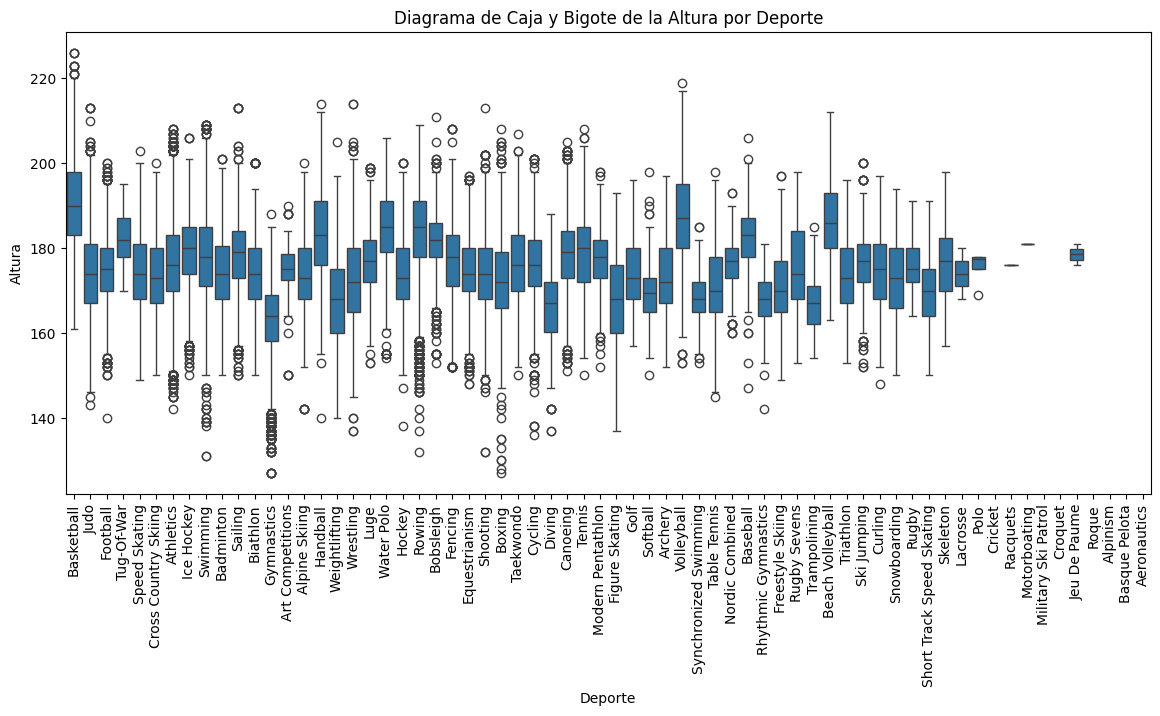

In [ ]:
plt.figure(figsize=(14, 6))
sns.boxplot(x='Sport', y='Height', data=athlete_data)
plt.title('Diagrama de Caja y Bigote de la Altura por Deporte')
plt.xlabel('Deporte')
plt.ylabel('Altura')
plt.xticks(rotation=90)
plt.grid(False)
plt.show()

### Storytelling
Contar el número de atletas por año y género

In [ ]:
athlete_count = athlete_data.groupby(['Year', 'Sex']).size().unstack()

Graficar la tendencia de la participación de atletas por año y género

<Figure size 1400x600 with 0 Axes>

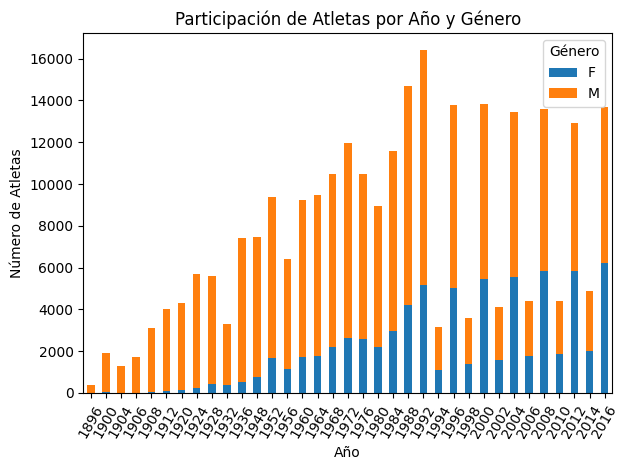

In [ ]:
plt.figure(figsize=(14, 6))
athlete_count.plot(kind='bar', stacked=True)
plt.title('Participación de Atletas por Año y Género')
plt.xlabel('Año')
plt.ylabel('Número de Atletas')
plt.legend(title='Género')
plt.xticks(rotation=60)
plt.grid(axis='y')
plt.grid(False)
plt.tight_layout()
plt.show()

Tendencia de la edad promedio de los atletas por año

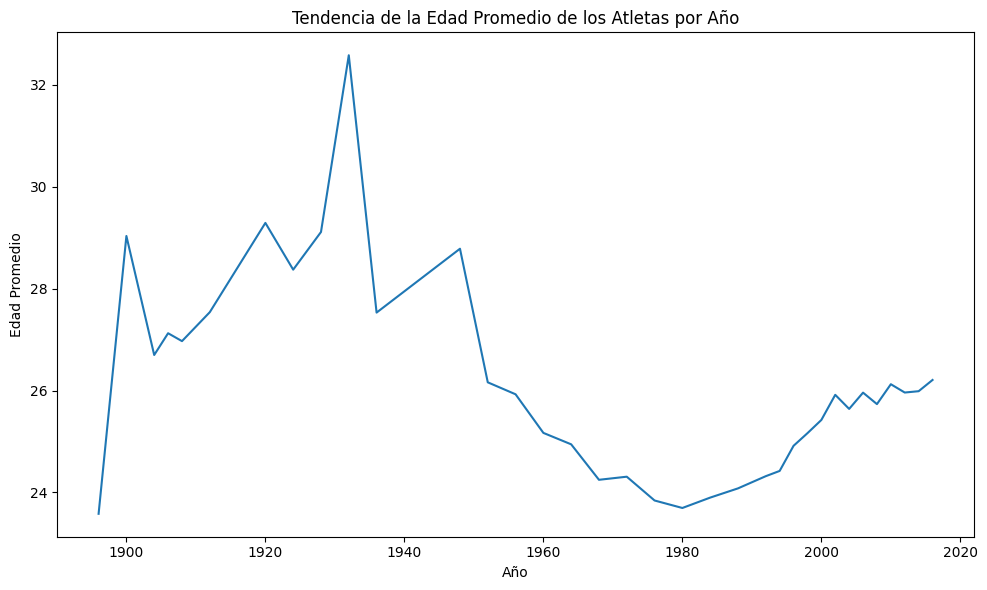

In [ ]:
# Calcular la edad promedio de los atletas por año
avg_age_by_year = athlete_data.groupby('Year')['Age'].mean()

# Graficar la tendencia de la edad promedio de los atletas por año
plt.figure(figsize=(10, 6))
avg_age_by_year.plot()
plt.title('Tendencia de la Edad Promedio de los Atletas por Año')
plt.xlabel('Año')
plt.ylabel('Edad Promedio')
plt.grid(False)
plt.tight_layout()
plt.show()

Los países con más medallas

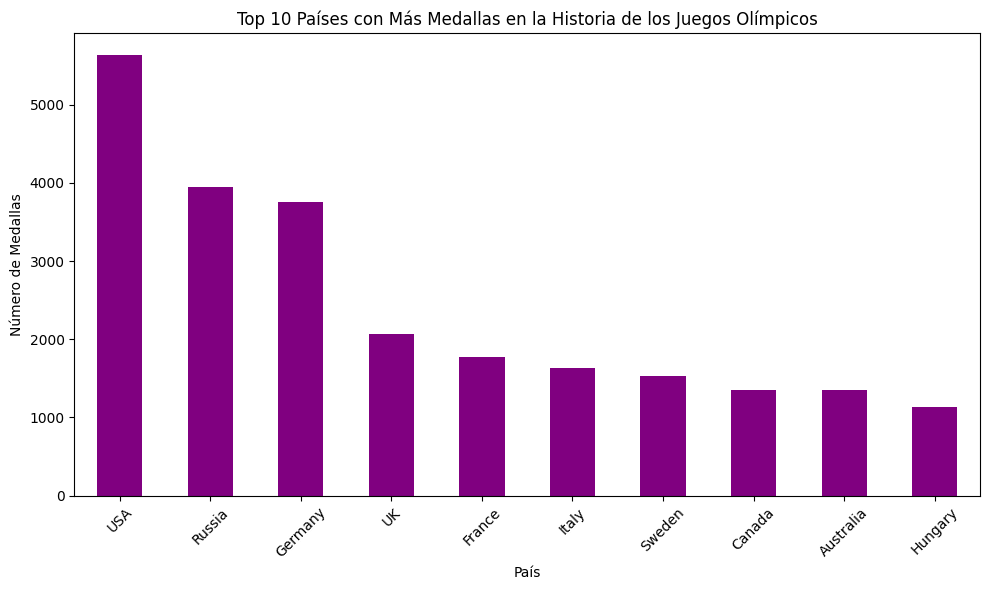

In [ ]:
# Contar el número de medallas por país
medal_count = athlete_data[athlete_data['Medal'].notnull()].groupby('region').size().sort_values(ascending=False)

# Top 10 países con más medallas
top_countries = medal_count.head(10)

# Graficar los países con más medallas
plt.figure(figsize=(10, 6))
top_countries.plot(kind='bar', color='purple')
plt.title('Top 10 Países con Más Medallas en la Historia de los Juegos Olímpicos')
plt.xlabel('País')
plt.ylabel('Número de Medallas')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.grid(False)
plt.tight_layout()
plt.show()

Visualizaciones interactivas

In [ ]:
# Crear una figura
p = figure(title="Medallas por Año", x_axis_label='Año', y_axis_label='Número de Medallas')

# Preparar los datos
year = athlete_data['Year'].value_counts().index.sort_values()
medals = athlete_data[athlete_data['Medal'].notnull()].groupby('Year').size().reindex(year)

# Añadir círculos a la figura
p.circle(year, medals, size=10, color='navy', alpha=0.5)

# Mostrar la figura
output_file("olympic_medals.html")
show(p)

Visualizar mapas interactivos

WordCloud para visualizar las palabras más frecuentes en los comentarios:

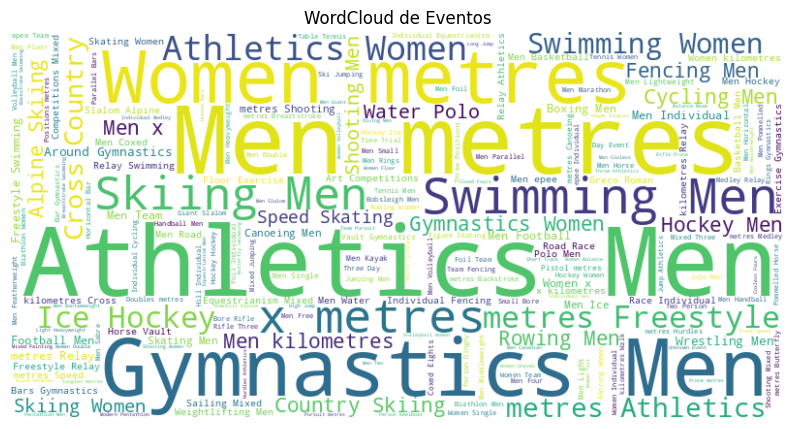

In [ ]:
# Concatenar todos los eventos
events = ' '.join(athlete_data['Event'].dropna())

# Crear el WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(events)

# Visualizar el WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud de Eventos')
plt.show()

In [ ]:
athlete_data['Year'].max()

2016